In [1]:
pip install gym

Note: you may need to restart the kernel to use updated packages.


**Part I: Define an RL Environment [30 points]**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import gym 
from gym import spaces
import matplotlib.patches as mpatches
from IPython.display import display

In [3]:
class GridEnvironment(gym.Env):
    def __init__(self):    
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 100
        self.reward= 0
    
        #  Defining rewards, start position and goal of robot
        self.positive_rewards1 = [0, 2]
        self.positive_rewards2 = [1, 1]
        self.positive_rewards3 = [3, 1]
        self.negative_rewards1 = [1, 2]
        self.negative_rewards2 = [2, 0]
        self.negative_rewards3 = [3, 2]
        self.robot_position = [3,0]
        self.goal_position = [0,3]

        # Creating a grid of 4X4
        self.state = np.zeros((4, 4))
        self.state[tuple(self.robot_position)] = 1
        self.state[tuple(self.goal_position)] = 10
        self.state[tuple(self.positive_rewards1)] = 5
        self.state[tuple(self.positive_rewards2)] = 5
        self.state[tuple(self.positive_rewards3)] = 5
        self.state[tuple(self.negative_rewards1)] = -3
        self.state[tuple(self.negative_rewards2)] = -3
        self.state[tuple(self.negative_rewards3)] = -3

    
    def reset(self):
        self.timestep = 0
        self.robot_position = [3, 0]
        position= self.robot_position[0]*4+self.robot_position[1]
        self.goal_position = [0, 3]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.robot_position)] = 1
        self.state[tuple(self.goal_position)] = 10
        self.state[tuple(self.positive_rewards1)] = 5
        self.state[tuple(self.positive_rewards2)] = 5
        self.state[tuple(self.positive_rewards3)] = 5
        self.state[tuple(self.negative_rewards1)] = -3
        self.state[tuple(self.negative_rewards2)] = -3
        self.state[tuple(self.negative_rewards3)] = -3
        self.reward = 0
        return position

    def step(self, action):
        self.state[tuple(self.robot_position)] = 0
        negative_reward_positions = [self.negative_rewards1, self.negative_rewards2, self.negative_rewards3]
        positive_reward_positions = [self.positive_rewards1, self.positive_rewards2, self.positive_rewards3]
        # If action is up
        if action == 0:
            # The robot row index is decreased by 1
            self.robot_position[0] = self.robot_position[0] - 1
            # The robot row index is less than the lower bounds, robot must stay in the same position
            if self.robot_position[0] == -1:
                self.robot_position[0] = self.robot_position[0] + 1
        # If action is down
        if action == 1:
            # The robot row index is increased by 1
            self.robot_position[0] = self.robot_position[0] + 1
            # The robot row index is greater than the upper bounds, robot must stay in the same position
            if self.robot_position[0] == 4:
                self.robot_position[0] = self.robot_position[0] - 1
        # If action is left        
        if action == 2:
            # The robot column index is decreased by 1
            self.robot_position[1] = self.robot_position[1] - 1
            # The robot column index is less than the lower bounds, robot must stay in the same position
            if self.robot_position[1] == -1:
                self.robot_position[1] = self.robot_position[1]+1
        # If action is right        
        if action == 3:
            # The robot column index is increased by 1
            self.robot_position[1] = self.robot_position[0] + 1
            # The robot column index is greater than the upper bounds, robot must stay in the same position
            if self.robot_position[1] == 4:
                self.robot_position[1] = self.robot_position[1] -1
        # limit the row and column indices of the robot's position to be between 0 and 3 (inclusive) 
        self.robot_position = np.clip(self.robot_position, 0, 3)
        state_table=np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])
        curr = state_table[tuple(self.robot_position)]

        for value in negative_reward_positions:
            if np.array_equal(self.robot_position, value):
                self.reward = self.reward - 3
                break
        for value in positive_reward_positions:
            if np.array_equal(self.robot_position, value):
                self.reward = self.reward + 5
                break
                
        goalFlag = False
        if np.array_equal(self.robot_position, self.goal_position):
            self.reward = self.reward + 10
            goalFlag = True
            
        self.state[tuple(self.robot_position)] = 1
        self.state[tuple(self.positive_rewards1)] = 5
        self.state[tuple(self.positive_rewards2)] = 5
        self.state[tuple(self.positive_rewards3)] = 5
        self.state[tuple(self.negative_rewards1)] = -3
        self.state[tuple(self.negative_rewards2)] = -3
        self.state[tuple(self.negative_rewards3)] = -3

        self.timestep = self.timestep + 1
        if (self.timestep >= self.max_timesteps or goalFlag):
            done = True
        else:
            done = False
        return curr, self.reward, done

    def render(self):
        import time
        time.sleep(0.01)
        return plt.imshow(self.state)
#         time.sleep(0.01)

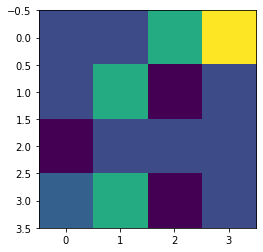

In [4]:
environment = GridEnvironment()
observation = environment.reset()
environment.render()

In [5]:
action_list =[0,1,2,3]
action_dictionary  ={0:"up", 1:"down", 2:"left", 3:"right"}

Time Step :  1
Current state :  12
Chosen action :  down
Reward :  0


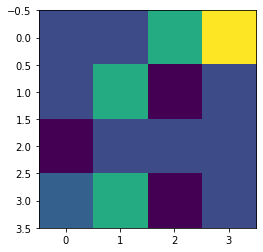

Time Step :  2
Current state :  12
Chosen action :  down
Reward :  0


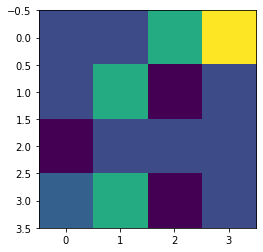

Time Step :  3
Current state :  15
Chosen action :  right
Reward :  0


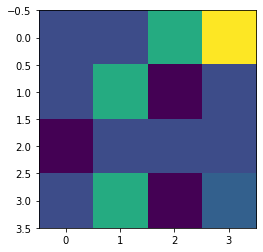

Time Step :  4
Current state :  14
Chosen action :  left
Reward :  -3


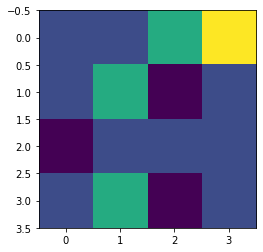

Time Step :  5
Current state :  15
Chosen action :  right
Reward :  -3


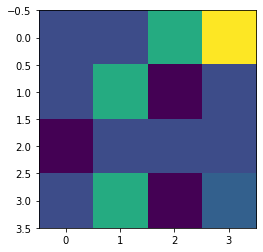

Time Step :  6
Current state :  11
Chosen action :  up
Reward :  -3


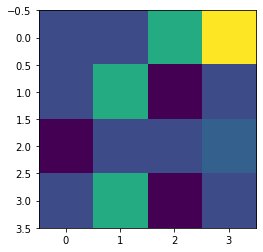

Time Step :  7
Current state :  11
Chosen action :  right
Reward :  -3


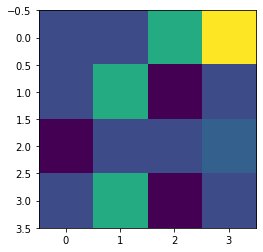

Time Step :  8
Current state :  15
Chosen action :  down
Reward :  -3


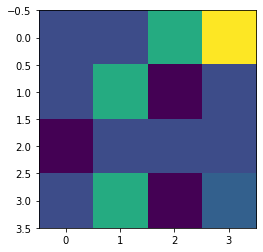

Time Step :  9
Current state :  14
Chosen action :  left
Reward :  -6


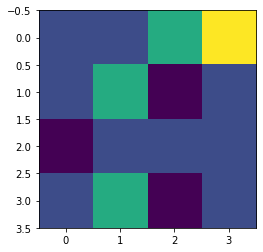

Time Step :  10
Current state :  14
Chosen action :  down
Reward :  -9


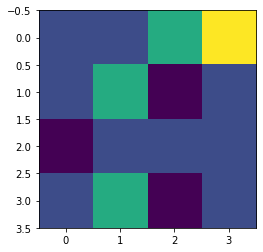

Time Step :  11
Current state :  14
Chosen action :  down
Reward :  -12


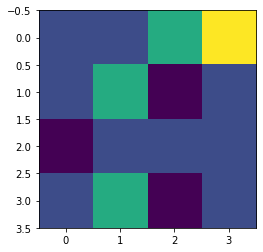

Time Step :  12
Current state :  15
Chosen action :  right
Reward :  -12


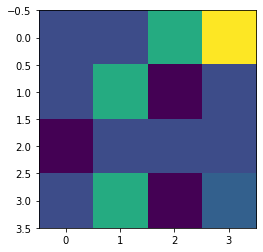

Time Step :  13
Current state :  15
Chosen action :  down
Reward :  -12


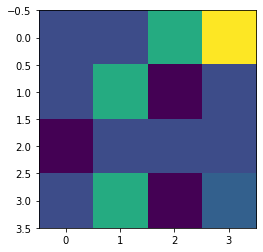

Time Step :  14
Current state :  11
Chosen action :  up
Reward :  -12


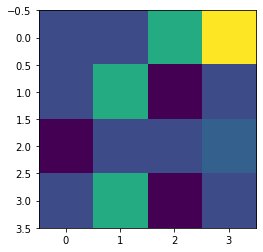

Time Step :  15
Current state :  7
Chosen action :  up
Reward :  -12


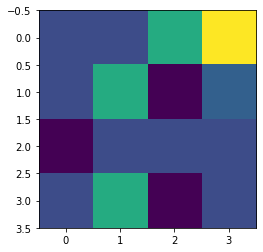

Time Step :  16
Current state :  6
Chosen action :  right
Reward :  -15


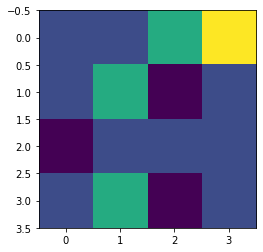

Time Step :  17
Current state :  10
Chosen action :  down
Reward :  -15


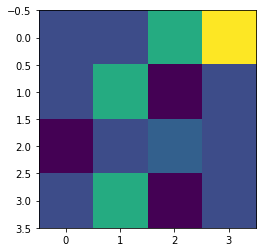

Time Step :  18
Current state :  14
Chosen action :  down
Reward :  -18


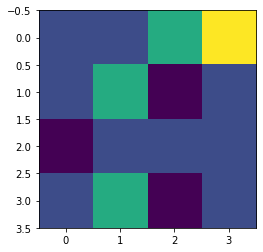

Time Step :  19
Current state :  10
Chosen action :  up
Reward :  -18


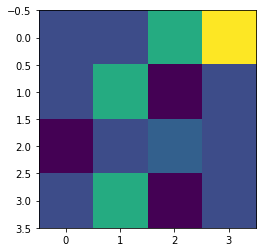

In [6]:
environment.reset()
for timestep in range(1,20):
    random = np.random.choice(action_list)
    observation, reward, done = environment.step(random)
    print("Time Step : ",timestep)
    print("Current state : ",observation)
    print("Chosen action : ",action_dictionary[random])
    print('Reward : ', reward)
    plt.show(environment.render())

**Part II: Solve your environment using – SARSA [40 points]**

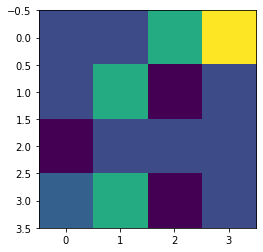

In [7]:
import numpy as np
import gym
environment = GridEnvironment()
observation = environment.reset()
environment.render()

In [8]:
def sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix):
    epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix = epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix
    # Starting the SARSA learning
    all_rewards, all_epsilons = [], []
    reward, max_reward, average = 0,0,0
    for episode in range(number_of_episodes):
        step = 0
        state1 = environment.reset()
        # Action
        action1=0
        if np.random.uniform(0, 1) < epsilon:
            action1 = environment.action_space.sample()
        else:
            action1 = np.argmax(Q_matrix[state1, :])
        while step < max_steps:
            environment.render()
            state2, reward, done = environment.step(action1)

            # Next Action
            action2=0
            if np.random.uniform(0, 1) < epsilon:
                action2 = environment.action_space.sample()
            else:
                action2 = np.argmax(Q_matrix[state2, :])

            # Learning Q-value
            predict = Q_matrix[state1, action1]
            target = reward + discount * Q_matrix[state2, action2]
            Q_matrix[state1, action1] = Q_matrix[state1, action1] + lr_rate * (target - predict)
            state1 = state2
            action1 = action2

            if epsilon > 0.1:
                epsilon = epsilon - epsilon_decay_rate

            #Updating the respective values
            step = step + 1
            reward = reward + 1

            #If at the end of learning process
            if done:
                all_epsilons.append(epsilon)
                all_rewards.append(reward) # Add the episode reward to the list
                break
                
        if reward>max_reward:
            max_reward = reward
        print(f'Episode Number : {episode}, Reward : {reward}, Epsilon : {epsilon}')
    print (f'Max Reward : {max_reward}')
    print (f'Performance : {reward/number_of_episodes}')
    print(Q_matrix)
    return all_epsilons, all_rewards
    
def epsilon_plot(epsilon1):
    all_epsilons=epsilon1
    plt.plot(all_epsilons, label='Epsilon Graph')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.legend()
    plt.show()
    
def reward_plot(reward1):
    all_rewards=reward1
    plt.plot(all_rewards, label='Rewards Graph')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.legend()
    plt.show()

Episode Number : 0, Reward : -2, Epsilon : 0.821
Episode Number : 1, Reward : -1, Epsilon : 0.7659999999999999
Episode Number : 2, Reward : 38, Epsilon : 0.6679999999999998
Episode Number : 3, Reward : 11, Epsilon : 0.6619999999999998
Episode Number : 4, Reward : 1, Epsilon : 0.6429999999999998
Episode Number : 5, Reward : -12, Epsilon : 0.5429999999999997
Episode Number : 6, Reward : -13, Epsilon : 0.4429999999999996
Episode Number : 7, Reward : 5, Epsilon : 0.4329999999999996
Episode Number : 8, Reward : 29, Epsilon : 0.4079999999999996
Episode Number : 9, Reward : 15, Epsilon : 0.3949999999999996
Episode Number : 10, Reward : 11, Epsilon : 0.38799999999999957
Episode Number : 11, Reward : -1, Epsilon : 0.3259999999999995
Episode Number : 12, Reward : -22, Epsilon : 0.22599999999999942
Episode Number : 13, Reward : -12, Epsilon : 0.12599999999999933
Episode Number : 14, Reward : 7, Epsilon : 0.09999999999999931
Episode Number : 15, Reward : 22, Epsilon : 0.09999999999999931
Episode N

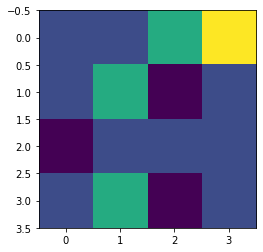

In [9]:
#Defining the different parameters
epsilon = 0.9
epsilon_decay_rate = 0.001
number_of_episodes = 100
max_steps = 100
lr_rate = 0.85             # learning rate or alpha
discount = 0.95            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa1, reward_sarsa1 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

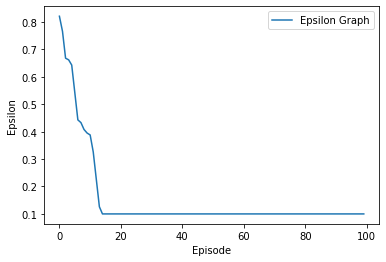

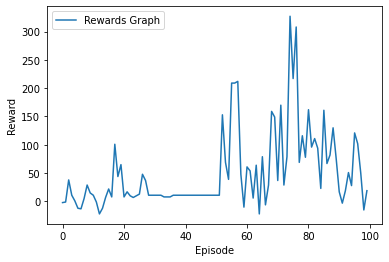

In [10]:
epsilon_plot(epsilon_sarsa1)
reward_plot(reward_sarsa1)

**Hyper parameter tuning**

Episode Number : 0, Reward : 5, Epsilon : 0.09999999999999946
Episode Number : 1, Reward : 90, Epsilon : 0.09999999999999946
Episode Number : 2, Reward : 148, Epsilon : 0.09999999999999946
Episode Number : 3, Reward : 8, Epsilon : 0.09999999999999946
Episode Number : 4, Reward : 108, Epsilon : 0.09999999999999946
Episode Number : 5, Reward : 93, Epsilon : 0.09999999999999946
Episode Number : 6, Reward : 23, Epsilon : 0.09999999999999946
Episode Number : 7, Reward : 23, Epsilon : 0.09999999999999946
Episode Number : 8, Reward : 120, Epsilon : 0.09999999999999946
Episode Number : 9, Reward : 15, Epsilon : 0.09999999999999946
Episode Number : 10, Reward : -2, Epsilon : 0.09999999999999946
Episode Number : 11, Reward : -15, Epsilon : 0.09999999999999946
Episode Number : 12, Reward : 199, Epsilon : 0.09999999999999946
Episode Number : 13, Reward : 31, Epsilon : 0.09999999999999946
Episode Number : 14, Reward : 47, Epsilon : 0.09999999999999946
Episode Number : 15, Reward : 147, Epsilon : 0.

Episode Number : 127, Reward : 161, Epsilon : 0.09999999999999946
Episode Number : 128, Reward : 18, Epsilon : 0.09999999999999946
Episode Number : 129, Reward : 54, Epsilon : 0.09999999999999946
Episode Number : 130, Reward : 6, Epsilon : 0.09999999999999946
Episode Number : 131, Reward : 384, Epsilon : 0.09999999999999946
Episode Number : 132, Reward : 242, Epsilon : 0.09999999999999946
Episode Number : 133, Reward : 116, Epsilon : 0.09999999999999946
Episode Number : 134, Reward : 120, Epsilon : 0.09999999999999946
Episode Number : 135, Reward : 70, Epsilon : 0.09999999999999946
Episode Number : 136, Reward : 29, Epsilon : 0.09999999999999946
Episode Number : 137, Reward : -13, Epsilon : 0.09999999999999946
Episode Number : 138, Reward : 148, Epsilon : 0.09999999999999946
Episode Number : 139, Reward : 143, Epsilon : 0.09999999999999946
Episode Number : 140, Reward : 125, Epsilon : 0.09999999999999946
Episode Number : 141, Reward : 219, Epsilon : 0.09999999999999946
Episode Number :

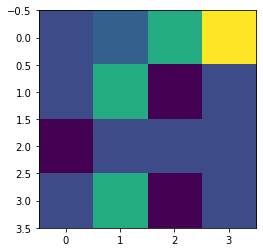

In [11]:
#Defining the different parameters
epsilon = 0.7
epsilon_decay_rate = 0.01
number_of_episodes = 200
max_steps = 100
lr_rate = 0.85             # learning rate or alpha
discount = 0.95            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa2, reward_sarsa2 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

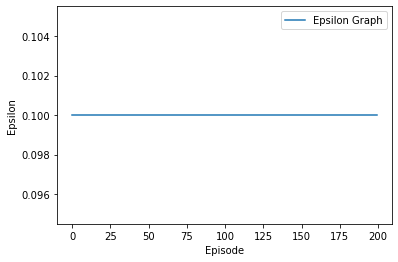

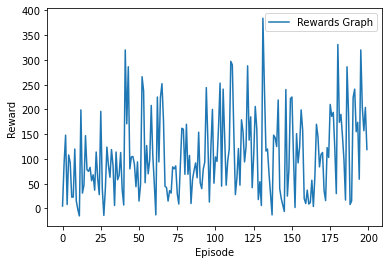

In [12]:
epsilon_plot(epsilon_sarsa2)
reward_plot(reward_sarsa2)

Episode Number : 0, Reward : 5, Epsilon : 0.491
Episode Number : 1, Reward : 15, Epsilon : 0.3909999999999999
Episode Number : 2, Reward : 11, Epsilon : 0.3769999999999999
Episode Number : 3, Reward : 11, Epsilon : 0.3679999999999999
Episode Number : 4, Reward : 57, Epsilon : 0.32999999999999985
Episode Number : 5, Reward : 27, Epsilon : 0.3029999999999998
Episode Number : 6, Reward : 11, Epsilon : 0.2989999999999998
Episode Number : 7, Reward : 9, Epsilon : 0.2729999999999998
Episode Number : 8, Reward : 230, Epsilon : 0.1729999999999997
Episode Number : 9, Reward : 5, Epsilon : 0.1669999999999997
Episode Number : 10, Reward : 29, Epsilon : 0.09999999999999964
Episode Number : 11, Reward : 21, Epsilon : 0.09999999999999964
Episode Number : 12, Reward : 163, Epsilon : 0.09999999999999964
Episode Number : 13, Reward : 23, Epsilon : 0.09999999999999964
Episode Number : 14, Reward : 177, Epsilon : 0.09999999999999964
Episode Number : 15, Reward : 90, Epsilon : 0.09999999999999964
Episode 

Episode Number : 127, Reward : 97, Epsilon : 0.09999999999999964
Episode Number : 128, Reward : 155, Epsilon : 0.09999999999999964
Episode Number : 129, Reward : 58, Epsilon : 0.09999999999999964
Episode Number : 130, Reward : 225, Epsilon : 0.09999999999999964
Episode Number : 131, Reward : 106, Epsilon : 0.09999999999999964
Episode Number : 132, Reward : 132, Epsilon : 0.09999999999999964
Episode Number : 133, Reward : 109, Epsilon : 0.09999999999999964
Episode Number : 134, Reward : 329, Epsilon : 0.09999999999999964
Episode Number : 135, Reward : 146, Epsilon : 0.09999999999999964
Episode Number : 136, Reward : 60, Epsilon : 0.09999999999999964
Episode Number : 137, Reward : 298, Epsilon : 0.09999999999999964
Episode Number : 138, Reward : 317, Epsilon : 0.09999999999999964
Episode Number : 139, Reward : 315, Epsilon : 0.09999999999999964
Episode Number : 140, Reward : 157, Epsilon : 0.09999999999999964
Episode Number : 141, Reward : 30, Epsilon : 0.09999999999999964
Episode Number

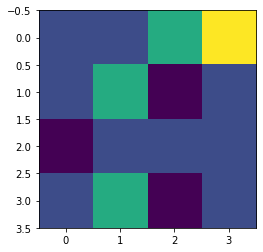

In [13]:
#Defining the different parameters
epsilon = 0.5
epsilon_decay_rate = 0.001
number_of_episodes = 225
max_steps = 100
lr_rate = 0.75             # learning rate or alpha
discount = 0.85            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa3, reward_sarsa3 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

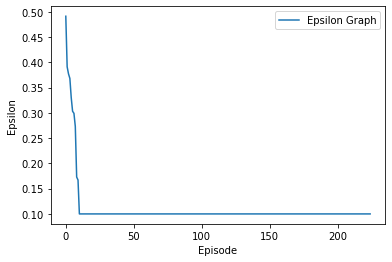

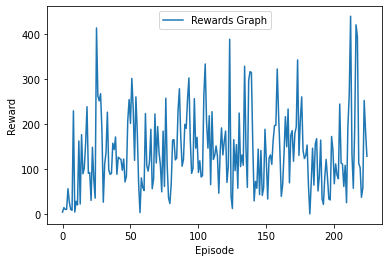

In [14]:
epsilon_plot(epsilon_sarsa3)
reward_plot(reward_sarsa3)

Episode Number : 0, Reward : 228, Epsilon : 1.3877787807814457e-16
Episode Number : 1, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 2, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 3, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 4, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 5, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 6, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 7, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 8, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 9, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 10, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 11, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 12, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 13, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 14, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 1

Episode Number : 124, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 125, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 126, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 127, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 128, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 129, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 130, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 131, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 132, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 133, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 134, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 135, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 136, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 137, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 138, Reward : 1, Epsilon : 1.3877787807814457

Episode Number : 247, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 248, Reward : 1, Epsilon : 1.3877787807814457e-16
Episode Number : 249, Reward : 1, Epsilon : 1.3877787807814457e-16
Max Reward : 228
Performance : 0.004
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.55000000e+00]
 [-2.93250000e+00  3.25694154e+03  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.55000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.20734851e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.55000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.0000

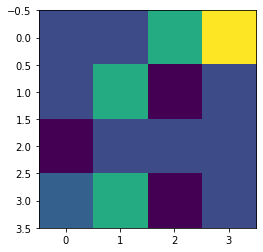

In [15]:
#Defining the different parameters
epsilon = 0.8
epsilon_decay_rate = 0.1
number_of_episodes = 250
max_steps = 100
lr_rate = 0.85             # learning rate or alpha
discount = 0.95            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa4, reward_sarsa4 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

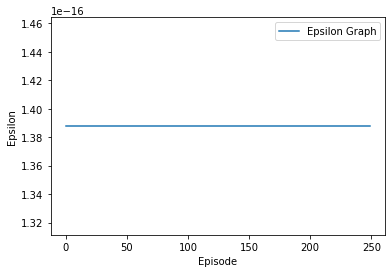

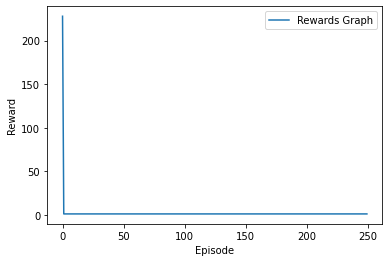

In [16]:
epsilon_plot(epsilon_sarsa4)
reward_plot(reward_sarsa4)

Episode Number : 0, Reward : 11, Epsilon : 0.16399999999999998
Episode Number : 1, Reward : 35, Epsilon : 0.09199999999999997
Episode Number : 2, Reward : 11, Epsilon : 0.09199999999999997
Episode Number : 3, Reward : 11, Epsilon : 0.09199999999999997
Episode Number : 4, Reward : 11, Epsilon : 0.09199999999999997
Episode Number : 5, Reward : 11, Epsilon : 0.09199999999999997
Episode Number : 6, Reward : 11, Epsilon : 0.09199999999999997
Episode Number : 7, Reward : 455, Epsilon : 0.09199999999999997
Episode Number : 8, Reward : 11, Epsilon : 0.09199999999999997
Episode Number : 9, Reward : 11, Epsilon : 0.09199999999999997
Episode Number : 10, Reward : 130, Epsilon : 0.09199999999999997
Episode Number : 11, Reward : 11, Epsilon : 0.09199999999999997
Episode Number : 12, Reward : 11, Epsilon : 0.09199999999999997
Episode Number : 13, Reward : 11, Epsilon : 0.09199999999999997
Episode Number : 14, Reward : 11, Epsilon : 0.09199999999999997
Episode Number : 15, Reward : 11, Epsilon : 0.09

Episode Number : 127, Reward : 106, Epsilon : 0.09199999999999997
Episode Number : 128, Reward : 109, Epsilon : 0.09199999999999997
Episode Number : 129, Reward : 150, Epsilon : 0.09199999999999997
Episode Number : 130, Reward : 140, Epsilon : 0.09199999999999997
Episode Number : 131, Reward : 66, Epsilon : 0.09199999999999997
Episode Number : 132, Reward : 138, Epsilon : 0.09199999999999997
Episode Number : 133, Reward : 132, Epsilon : 0.09199999999999997
Episode Number : 134, Reward : 48, Epsilon : 0.09199999999999997
Episode Number : 135, Reward : 200, Epsilon : 0.09199999999999997
Episode Number : 136, Reward : 144, Epsilon : 0.09199999999999997
Episode Number : 137, Reward : 123, Epsilon : 0.09199999999999997
Episode Number : 138, Reward : 84, Epsilon : 0.09199999999999997
Episode Number : 139, Reward : 196, Epsilon : 0.09199999999999997
Episode Number : 140, Reward : 204, Epsilon : 0.09199999999999997
Episode Number : 141, Reward : 184, Epsilon : 0.09199999999999997
Episode Numbe

Episode Number : 252, Reward : 365, Epsilon : 0.09199999999999997
Episode Number : 253, Reward : 141, Epsilon : 0.09199999999999997
Episode Number : 254, Reward : 259, Epsilon : 0.09199999999999997
Episode Number : 255, Reward : 206, Epsilon : 0.09199999999999997
Episode Number : 256, Reward : 333, Epsilon : 0.09199999999999997
Episode Number : 257, Reward : 246, Epsilon : 0.09199999999999997
Episode Number : 258, Reward : 152, Epsilon : 0.09199999999999997
Episode Number : 259, Reward : 238, Epsilon : 0.09199999999999997
Episode Number : 260, Reward : 243, Epsilon : 0.09199999999999997
Episode Number : 261, Reward : 219, Epsilon : 0.09199999999999997
Episode Number : 262, Reward : 161, Epsilon : 0.09199999999999997
Episode Number : 263, Reward : 56, Epsilon : 0.09199999999999997
Episode Number : 264, Reward : 191, Epsilon : 0.09199999999999997
Episode Number : 265, Reward : 302, Epsilon : 0.09199999999999997
Episode Number : 266, Reward : 107, Epsilon : 0.09199999999999997
Episode Num

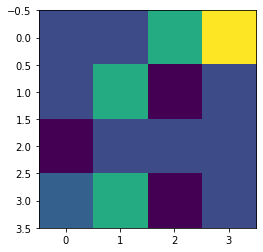

In [17]:
#Defining the different parameters
epsilon = 0.2
epsilon_decay_rate = 0.009
number_of_episodes = 275
max_steps = 100
lr_rate = 0.8             # learning rate or alpha
discount = 0.7            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa5, reward_sarsa5 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

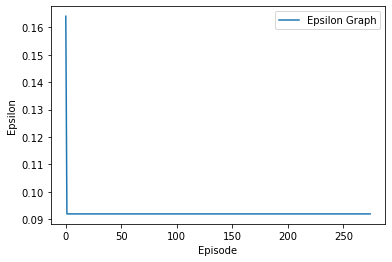

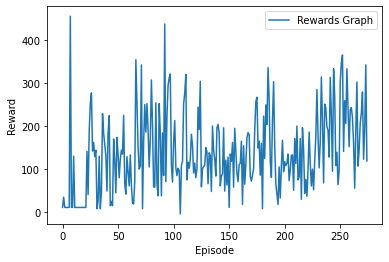

In [18]:
epsilon_plot(epsilon_sarsa5) 
reward_plot(reward_sarsa5)

Episode Number : 0, Reward : 5, Epsilon : 0.05000000000000002
Episode Number : 1, Reward : 180, Epsilon : 0.05000000000000002
Episode Number : 2, Reward : 71, Epsilon : 0.05000000000000002
Episode Number : 3, Reward : 168, Epsilon : 0.05000000000000002
Episode Number : 4, Reward : 1, Epsilon : 0.05000000000000002
Episode Number : 5, Reward : 217, Epsilon : 0.05000000000000002
Episode Number : 6, Reward : 381, Epsilon : 0.05000000000000002
Episode Number : 7, Reward : 246, Epsilon : 0.05000000000000002
Episode Number : 8, Reward : 366, Epsilon : 0.05000000000000002
Episode Number : 9, Reward : 401, Epsilon : 0.05000000000000002
Episode Number : 10, Reward : 11, Epsilon : 0.05000000000000002
Episode Number : 11, Reward : 387, Epsilon : 0.05000000000000002
Episode Number : 12, Reward : 231, Epsilon : 0.05000000000000002
Episode Number : 13, Reward : 194, Epsilon : 0.05000000000000002
Episode Number : 14, Reward : 173, Epsilon : 0.05000000000000002
Episode Number : 15, Reward : 256, Epsilo

Episode Number : 127, Reward : 215, Epsilon : 0.05000000000000002
Episode Number : 128, Reward : 222, Epsilon : 0.05000000000000002
Episode Number : 129, Reward : 193, Epsilon : 0.05000000000000002
Episode Number : 130, Reward : 201, Epsilon : 0.05000000000000002
Episode Number : 131, Reward : 198, Epsilon : 0.05000000000000002
Episode Number : 132, Reward : 198, Epsilon : 0.05000000000000002
Episode Number : 133, Reward : 178, Epsilon : 0.05000000000000002
Episode Number : 134, Reward : 130, Epsilon : 0.05000000000000002
Episode Number : 135, Reward : 287, Epsilon : 0.05000000000000002
Episode Number : 136, Reward : 96, Epsilon : 0.05000000000000002
Episode Number : 137, Reward : 82, Epsilon : 0.05000000000000002
Episode Number : 138, Reward : 44, Epsilon : 0.05000000000000002
Episode Number : 139, Reward : 337, Epsilon : 0.05000000000000002
Episode Number : 140, Reward : 376, Epsilon : 0.05000000000000002
Episode Number : 141, Reward : 131, Epsilon : 0.05000000000000002
Episode Numbe

Episode Number : 252, Reward : 129, Epsilon : 0.05000000000000002
Episode Number : 253, Reward : 69, Epsilon : 0.05000000000000002
Episode Number : 254, Reward : 43, Epsilon : 0.05000000000000002
Episode Number : 255, Reward : 81, Epsilon : 0.05000000000000002
Episode Number : 256, Reward : 80, Epsilon : 0.05000000000000002
Episode Number : 257, Reward : 181, Epsilon : 0.05000000000000002
Episode Number : 258, Reward : 11, Epsilon : 0.05000000000000002
Episode Number : 259, Reward : 195, Epsilon : 0.05000000000000002
Episode Number : 260, Reward : 46, Epsilon : 0.05000000000000002
Episode Number : 261, Reward : 213, Epsilon : 0.05000000000000002
Episode Number : 262, Reward : 341, Epsilon : 0.05000000000000002
Episode Number : 263, Reward : 348, Epsilon : 0.05000000000000002
Episode Number : 264, Reward : 353, Epsilon : 0.05000000000000002
Episode Number : 265, Reward : 280, Epsilon : 0.05000000000000002
Episode Number : 266, Reward : 418, Epsilon : 0.05000000000000002
Episode Number :

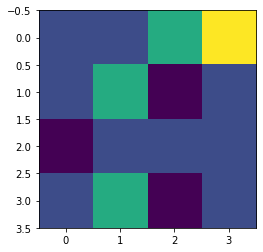

In [19]:
#Defining the different parameters
epsilon = 0.3
epsilon_decay_rate = 0.05
number_of_episodes = 300
max_steps = 100
lr_rate = 0.5             # learning rate or alpha
discount = 0.5            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa6, reward_sarsa6 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

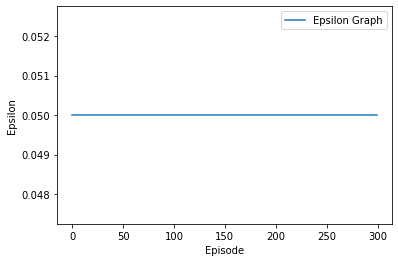

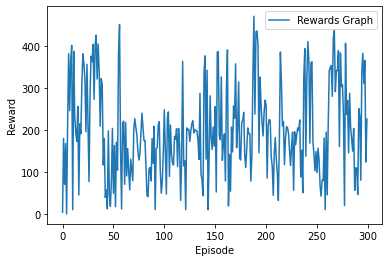

In [20]:
epsilon_plot(epsilon_sarsa6)
reward_plot(reward_sarsa6)

**Part III: Solve your environment using Q-learning [30 points]**

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import gym 
from gym import spaces
import matplotlib.patches as mpatches
from IPython.display import display
import time

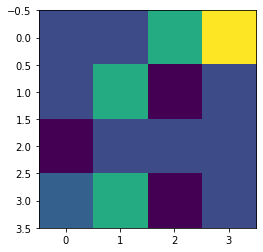

In [23]:
environment = GridEnvironment()
observation = environment.reset()
environment.render()

In [50]:
def q_learning(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix):
    epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix = epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix
    # Starting the Q-learning
    all_rewards, all_epsilons = [], []
    reward, max_reward, average = 0, 0, 0

    for episode in range(number_of_episodes):
        step = 0
        state = environment.reset()

        while step < max_steps:
            environment.render()
            if np.random.uniform(0, 1) < epsilon:
                action = environment.action_space.sample()
            else:
                action = np.argmax(Q_matrix[state, :])

            next_state, reward, done = environment.step(action)

            # Update Q-value
            predict = Q_matrix[state, action]
            target = reward + discount * np.max(Q_matrix[next_state, :])
            Q_matrix[state, action] = Q_matrix[state, action] + lr_rate * (target - predict)

            state = next_state

            if epsilon > 0.1:
                epsilon = epsilon - epsilon_decay_rate

            step = step + 1

            if done:
                all_epsilons.append(epsilon)
                all_rewards.append(reward)
                break

        if reward > max_reward:
            max_reward = reward
        print(f'Episode Number: {episode}, Reward: {reward}, Epsilon: {epsilon}')

    print(f'Max Reward: {max_reward}')
    print(f'Performance: {reward/number_of_episodes}')
    print(Q_matrix)

    return all_epsilons, all_rewards


def reward_plot(reward_values):
    figure, axes = plt.subplots()  # Creates a figure object and an axes object
    axes.plot(reward_values, label='Rewards Graph')  # Plotting the epsilon values
    axes.set_xlabel('Episode')  
    axes.set_ylabel('Rewards')  
    axes.legend()               
    plt.show()    

def epsilon_plot(epsilon_values):
    figure, axes = plt.subplots()  # Creates a figure object and an axes object
    axes.plot(epsilon_values, label='Epsilon Graph')  # Plotting the epsilon values
    axes.set_xlabel('Episode')  # x-axis label
    axes.set_ylabel('Epsilon')  # y-axis label
    axes.legend()               
    plt.show()                  


Episode Number: 0, Reward: -18, Epsilon: 0.7999999999999999
Episode Number: 1, Reward: 22, Epsilon: 0.7319999999999999
Episode Number: 2, Reward: 4, Epsilon: 0.6319999999999998
Episode Number: 3, Reward: -8, Epsilon: 0.5319999999999997
Episode Number: 4, Reward: 3, Epsilon: 0.5109999999999997
Episode Number: 5, Reward: -14, Epsilon: 0.4149999999999996
Episode Number: 6, Reward: 63, Epsilon: 0.3299999999999995
Episode Number: 7, Reward: 136, Epsilon: 0.22999999999999943
Episode Number: 8, Reward: -7, Epsilon: 0.12999999999999934
Episode Number: 9, Reward: 273, Epsilon: 0.09999999999999931
Episode Number: 10, Reward: 214, Epsilon: 0.09999999999999931
Episode Number: 11, Reward: 165, Epsilon: 0.09999999999999931
Episode Number: 12, Reward: 36, Epsilon: 0.09999999999999931
Episode Number: 13, Reward: -6, Epsilon: 0.09999999999999931
Episode Number: 14, Reward: -17, Epsilon: 0.09999999999999931
Episode Number: 15, Reward: -14, Epsilon: 0.09999999999999931
Episode Number: 16, Reward: -44, Ep

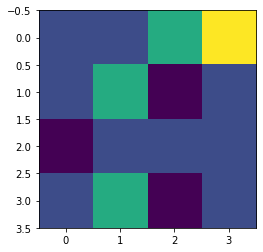

In [25]:
#Defining the different parameters
epsilon = 0.9
epsilon_decay_rate = 0.001
number_of_episodes = 100
max_steps = 100
lr_rate = 0.85             # learning rate or alpha
discount = 0.95            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_q_learning1, reward_q_learning1 = q_learning(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

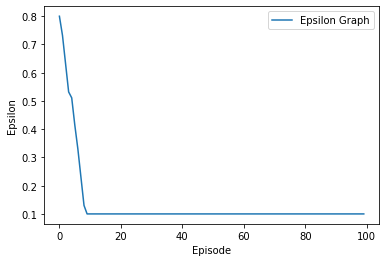

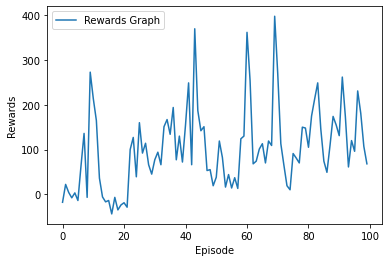

In [51]:
epsilon_plot(epsilon_q_learning1)
reward_plot(reward_q_learning1)

**Hyper parameter tuning**

Episode Number: 0, Reward: 4, Epsilon: 0.5899999999999999
Episode Number: 1, Reward: 60, Epsilon: 0.09999999999999946
Episode Number: 2, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 3, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 4, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 5, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 6, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 7, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 8, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 9, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 10, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 11, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 12, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 13, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 14, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 15, Reward: 10, Epsilon: 0.09999999999999946
Episode Number: 16, Reward: 10, Epsi

Episode Number: 134, Reward: 107, Epsilon: 0.09999999999999946
Episode Number: 135, Reward: 74, Epsilon: 0.09999999999999946
Episode Number: 136, Reward: 64, Epsilon: 0.09999999999999946
Episode Number: 137, Reward: 65, Epsilon: 0.09999999999999946
Episode Number: 138, Reward: 59, Epsilon: 0.09999999999999946
Episode Number: 139, Reward: 58, Epsilon: 0.09999999999999946
Episode Number: 140, Reward: 27, Epsilon: 0.09999999999999946
Episode Number: 141, Reward: 49, Epsilon: 0.09999999999999946
Episode Number: 142, Reward: 11, Epsilon: 0.09999999999999946
Episode Number: 143, Reward: 30, Epsilon: 0.09999999999999946
Episode Number: 144, Reward: 140, Epsilon: 0.09999999999999946
Episode Number: 145, Reward: 363, Epsilon: 0.09999999999999946
Episode Number: 146, Reward: 270, Epsilon: 0.09999999999999946
Episode Number: 147, Reward: 122, Epsilon: 0.09999999999999946
Episode Number: 148, Reward: 90, Epsilon: 0.09999999999999946
Episode Number: 149, Reward: 55, Epsilon: 0.09999999999999946
Epi

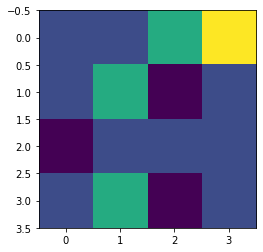

In [27]:
#Defining the different parameters
epsilon = 0.7
epsilon_decay_rate = 0.01
number_of_episodes = 200
max_steps = 100
lr_rate = 0.85             # learning rate or alpha
discount = 0.95            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_q_learning2, reward_q_learning2 = q_learning(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)


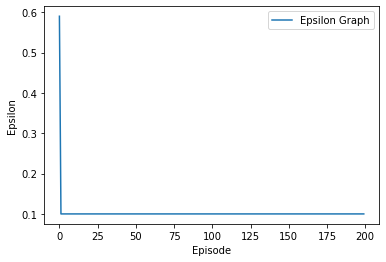

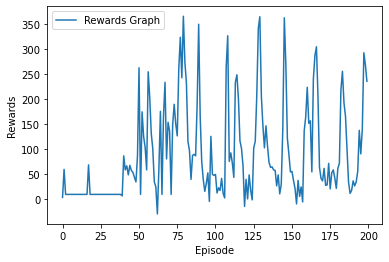

In [52]:
epsilon_plot(epsilon_q_learning2)
reward_plot(reward_q_learning2)

Episode Number: 0, Reward: 7, Epsilon: 0.472
Episode Number: 1, Reward: -2, Epsilon: 0.44599999999999995
Episode Number: 2, Reward: 73, Epsilon: 0.34599999999999986
Episode Number: 3, Reward: 81, Epsilon: 0.24599999999999977
Episode Number: 4, Reward: 87, Epsilon: 0.14599999999999969
Episode Number: 5, Reward: 136, Epsilon: 0.09999999999999964
Episode Number: 6, Reward: 198, Epsilon: 0.09999999999999964
Episode Number: 7, Reward: 171, Epsilon: 0.09999999999999964
Episode Number: 8, Reward: 148, Epsilon: 0.09999999999999964
Episode Number: 9, Reward: 147, Epsilon: 0.09999999999999964
Episode Number: 10, Reward: 172, Epsilon: 0.09999999999999964
Episode Number: 11, Reward: 194, Epsilon: 0.09999999999999964
Episode Number: 12, Reward: 389, Epsilon: 0.09999999999999964
Episode Number: 13, Reward: 363, Epsilon: 0.09999999999999964
Episode Number: 14, Reward: 253, Epsilon: 0.09999999999999964
Episode Number: 15, Reward: 126, Epsilon: 0.09999999999999964
Episode Number: 16, Reward: 187, Epsil

Episode Number: 133, Reward: 193, Epsilon: 0.09999999999999964
Episode Number: 134, Reward: 93, Epsilon: 0.09999999999999964
Episode Number: 135, Reward: 156, Epsilon: 0.09999999999999964
Episode Number: 136, Reward: 120, Epsilon: 0.09999999999999964
Episode Number: 137, Reward: 62, Epsilon: 0.09999999999999964
Episode Number: 138, Reward: 65, Epsilon: 0.09999999999999964
Episode Number: 139, Reward: 299, Epsilon: 0.09999999999999964
Episode Number: 140, Reward: 271, Epsilon: 0.09999999999999964
Episode Number: 141, Reward: 212, Epsilon: 0.09999999999999964
Episode Number: 142, Reward: 218, Epsilon: 0.09999999999999964
Episode Number: 143, Reward: 240, Epsilon: 0.09999999999999964
Episode Number: 144, Reward: 339, Epsilon: 0.09999999999999964
Episode Number: 145, Reward: 189, Epsilon: 0.09999999999999964
Episode Number: 146, Reward: 56, Epsilon: 0.09999999999999964
Episode Number: 147, Reward: 74, Epsilon: 0.09999999999999964
Episode Number: 148, Reward: 69, Epsilon: 0.0999999999999996

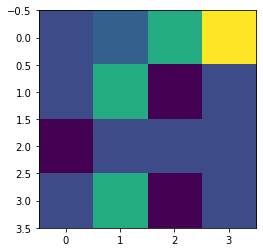

In [29]:
#Defining the different parameters
epsilon = 0.5
epsilon_decay_rate = 0.001
number_of_episodes = 225
max_steps = 100
lr_rate = 0.75             # learning rate or alpha
discount = 0.85            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_q_learning3, reward_q_learning3 = q_learning(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)


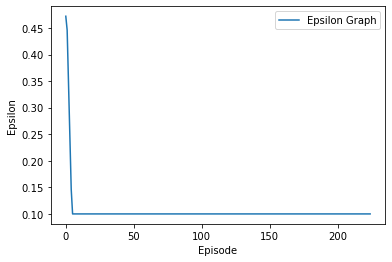

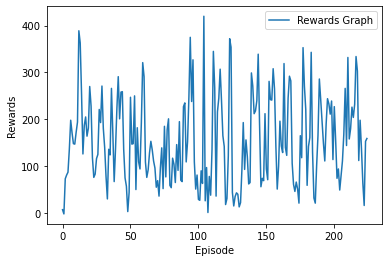

In [53]:
epsilon_plot(epsilon_q_learning3)
reward_plot(reward_q_learning3)

Episode Number: 0, Reward: 4, Epsilon: 1.3877787807814457e-16
Episode Number: 1, Reward: 399, Epsilon: 1.3877787807814457e-16
Episode Number: 2, Reward: 469, Epsilon: 1.3877787807814457e-16
Episode Number: 3, Reward: 467, Epsilon: 1.3877787807814457e-16
Episode Number: 4, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 5, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 6, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 7, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 8, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 9, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 10, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 11, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 12, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 13, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 14, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 15, Reward: 0, Epsilon: 1.3877787807814457e

Episode Number: 130, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 131, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 132, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 133, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 134, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 135, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 136, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 137, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 138, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 139, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 140, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 141, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 142, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 143, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 144, Reward: 0, Epsilon: 1.3877787807814457e-16
Episode Number: 145, Reward: 0, Epsilon:

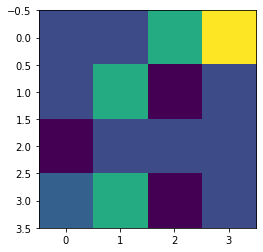

In [31]:
#Defining the different parameters
epsilon = 0.8
epsilon_decay_rate = 0.1
number_of_episodes = 250
max_steps = 100
lr_rate = 0.85             # learning rate or alpha
discount = 0.95            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_q_learning4, reward_q_learning4 = q_learning(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)


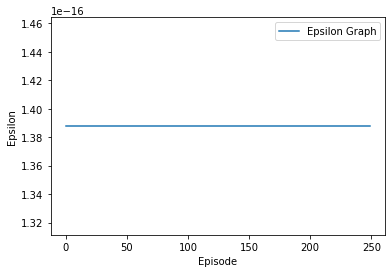

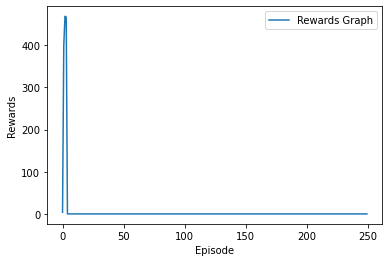

In [54]:
epsilon_plot(epsilon_q_learning4)
reward_plot(reward_q_learning4)

Episode Number: 0, Reward: 7, Epsilon: 0.16399999999999998
Episode Number: 1, Reward: 134, Epsilon: 0.09199999999999997
Episode Number: 2, Reward: -1, Epsilon: 0.09199999999999997
Episode Number: 3, Reward: 379, Epsilon: 0.09199999999999997
Episode Number: 4, Reward: 259, Epsilon: 0.09199999999999997
Episode Number: 5, Reward: 84, Epsilon: 0.09199999999999997
Episode Number: 6, Reward: 124, Epsilon: 0.09199999999999997
Episode Number: 7, Reward: 10, Epsilon: 0.09199999999999997
Episode Number: 8, Reward: 314, Epsilon: 0.09199999999999997
Episode Number: 9, Reward: 347, Epsilon: 0.09199999999999997
Episode Number: 10, Reward: 120, Epsilon: 0.09199999999999997
Episode Number: 11, Reward: 82, Epsilon: 0.09199999999999997
Episode Number: 12, Reward: 25, Epsilon: 0.09199999999999997
Episode Number: 13, Reward: 16, Epsilon: 0.09199999999999997
Episode Number: 14, Reward: 10, Epsilon: 0.09199999999999997
Episode Number: 15, Reward: 6, Epsilon: 0.09199999999999997
Episode Number: 16, Reward: 2

Episode Number: 133, Reward: 152, Epsilon: 0.09199999999999997
Episode Number: 134, Reward: 184, Epsilon: 0.09199999999999997
Episode Number: 135, Reward: 162, Epsilon: 0.09199999999999997
Episode Number: 136, Reward: 164, Epsilon: 0.09199999999999997
Episode Number: 137, Reward: 123, Epsilon: 0.09199999999999997
Episode Number: 138, Reward: 88, Epsilon: 0.09199999999999997
Episode Number: 139, Reward: 54, Epsilon: 0.09199999999999997
Episode Number: 140, Reward: 134, Epsilon: 0.09199999999999997
Episode Number: 141, Reward: 61, Epsilon: 0.09199999999999997
Episode Number: 142, Reward: 104, Epsilon: 0.09199999999999997
Episode Number: 143, Reward: 192, Epsilon: 0.09199999999999997
Episode Number: 144, Reward: 256, Epsilon: 0.09199999999999997
Episode Number: 145, Reward: 34, Epsilon: 0.09199999999999997
Episode Number: 146, Reward: 338, Epsilon: 0.09199999999999997
Episode Number: 147, Reward: 150, Epsilon: 0.09199999999999997
Episode Number: 148, Reward: 119, Epsilon: 0.09199999999999

Episode Number: 264, Reward: 68, Epsilon: 0.09199999999999997
Episode Number: 265, Reward: 95, Epsilon: 0.09199999999999997
Episode Number: 266, Reward: 90, Epsilon: 0.09199999999999997
Episode Number: 267, Reward: 137, Epsilon: 0.09199999999999997
Episode Number: 268, Reward: 172, Epsilon: 0.09199999999999997
Episode Number: 269, Reward: 122, Epsilon: 0.09199999999999997
Episode Number: 270, Reward: 132, Epsilon: 0.09199999999999997
Episode Number: 271, Reward: 153, Epsilon: 0.09199999999999997
Episode Number: 272, Reward: 164, Epsilon: 0.09199999999999997
Episode Number: 273, Reward: 96, Epsilon: 0.09199999999999997
Episode Number: 274, Reward: 289, Epsilon: 0.09199999999999997
Max Reward: 446
Performance: 1.050909090909091
[[ 97.01902997  89.24870477 118.2320414  222.97438147]
 [141.92051844 155.19861906 115.92240092 142.23597536]
 [910.55565061 119.1414162  144.89651304 148.60939274]
 [  0.           0.           0.           0.        ]
 [ 72.98844754  57.21156814  74.67947508 169

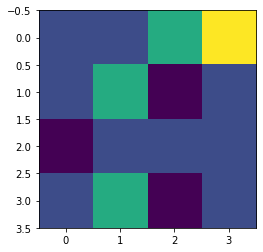

In [33]:
#Defining the different parameters
epsilon = 0.2
epsilon_decay_rate = 0.009
number_of_episodes = 275
max_steps = 100
lr_rate = 0.8             # learning rate or alpha
discount = 0.7            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_q_learning5, reward_q_learning5 = q_learning(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)


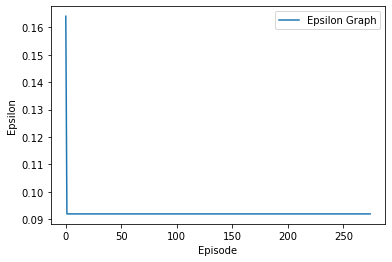

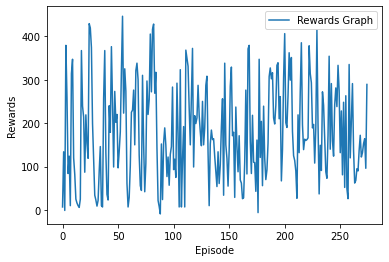

In [55]:
epsilon_plot(epsilon_q_learning5)
reward_plot(reward_q_learning5)

Episode Number: 0, Reward: -2, Epsilon: 0.05000000000000002
Episode Number: 1, Reward: 36, Epsilon: 0.05000000000000002
Episode Number: 2, Reward: 104, Epsilon: 0.05000000000000002
Episode Number: 3, Reward: 67, Epsilon: 0.05000000000000002
Episode Number: 4, Reward: 56, Epsilon: 0.05000000000000002
Episode Number: 5, Reward: 173, Epsilon: 0.05000000000000002
Episode Number: 6, Reward: 163, Epsilon: 0.05000000000000002
Episode Number: 7, Reward: 194, Epsilon: 0.05000000000000002
Episode Number: 8, Reward: 141, Epsilon: 0.05000000000000002
Episode Number: 9, Reward: 156, Epsilon: 0.05000000000000002
Episode Number: 10, Reward: -5, Epsilon: 0.05000000000000002
Episode Number: 11, Reward: 88, Epsilon: 0.05000000000000002
Episode Number: 12, Reward: 102, Epsilon: 0.05000000000000002
Episode Number: 13, Reward: 210, Epsilon: 0.05000000000000002
Episode Number: 14, Reward: 229, Epsilon: 0.05000000000000002
Episode Number: 15, Reward: 304, Epsilon: 0.05000000000000002
Episode Number: 16, Rewa

Episode Number: 133, Reward: 360, Epsilon: 0.05000000000000002
Episode Number: 134, Reward: 430, Epsilon: 0.05000000000000002
Episode Number: 135, Reward: 380, Epsilon: 0.05000000000000002
Episode Number: 136, Reward: 352, Epsilon: 0.05000000000000002
Episode Number: 137, Reward: 305, Epsilon: 0.05000000000000002
Episode Number: 138, Reward: 104, Epsilon: 0.05000000000000002
Episode Number: 139, Reward: 40, Epsilon: 0.05000000000000002
Episode Number: 140, Reward: 45, Epsilon: 0.05000000000000002
Episode Number: 141, Reward: 189, Epsilon: 0.05000000000000002
Episode Number: 142, Reward: 246, Epsilon: 0.05000000000000002
Episode Number: 143, Reward: 431, Epsilon: 0.05000000000000002
Episode Number: 144, Reward: 327, Epsilon: 0.05000000000000002
Episode Number: 145, Reward: 291, Epsilon: 0.05000000000000002
Episode Number: 146, Reward: 330, Epsilon: 0.05000000000000002
Episode Number: 147, Reward: 99, Epsilon: 0.05000000000000002
Episode Number: 148, Reward: 136, Epsilon: 0.0500000000000

Episode Number: 264, Reward: 28, Epsilon: 0.05000000000000002
Episode Number: 265, Reward: 151, Epsilon: 0.05000000000000002
Episode Number: 266, Reward: 17, Epsilon: 0.05000000000000002
Episode Number: 267, Reward: 117, Epsilon: 0.05000000000000002
Episode Number: 268, Reward: 129, Epsilon: 0.05000000000000002
Episode Number: 269, Reward: 49, Epsilon: 0.05000000000000002
Episode Number: 270, Reward: 317, Epsilon: 0.05000000000000002
Episode Number: 271, Reward: 237, Epsilon: 0.05000000000000002
Episode Number: 272, Reward: 385, Epsilon: 0.05000000000000002
Episode Number: 273, Reward: 405, Epsilon: 0.05000000000000002
Episode Number: 274, Reward: 371, Epsilon: 0.05000000000000002
Episode Number: 275, Reward: 232, Epsilon: 0.05000000000000002
Episode Number: 276, Reward: 335, Epsilon: 0.05000000000000002
Episode Number: 277, Reward: 390, Epsilon: 0.05000000000000002
Episode Number: 278, Reward: 381, Epsilon: 0.05000000000000002
Episode Number: 279, Reward: 237, Epsilon: 0.0500000000000

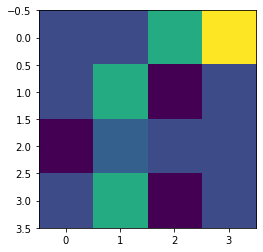

In [35]:
#Defining the different parameters
epsilon = 0.3
epsilon_decay_rate = 0.05
number_of_episodes = 300
max_steps = 100
lr_rate = 0.5             # learning rate or alpha
discount = 0.5            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_q_learning6, reward_q_learning6 = q_learning(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)


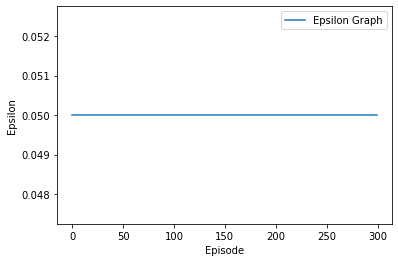

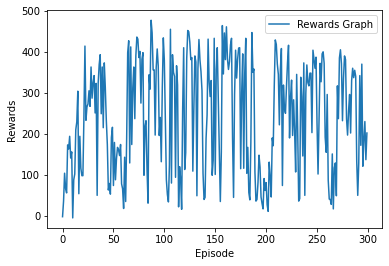

In [56]:
epsilon_plot(epsilon_q_learning6)
reward_plot(reward_q_learning6)

**Comparison of Q learning plots and Sarsa**

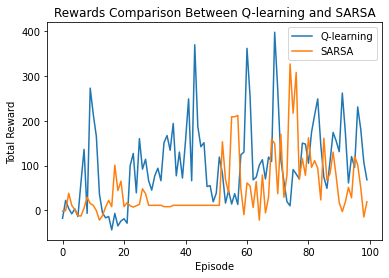

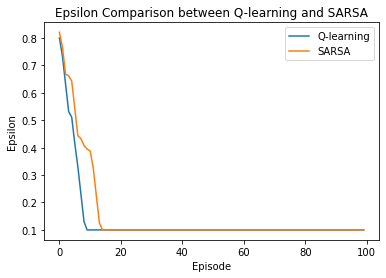

In [37]:
import matplotlib.pyplot as plt

plt.plot(reward_q_learning1, label='Q-learning')
plt.plot(reward_sarsa1, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards Comparison Between Q-learning and SARSA')
plt.legend()
plt.show()


plt.plot(epsilon_q_learning1, label='Q-learning')
plt.plot(epsilon_sarsa1, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Comparison between Q-learning and SARSA')
plt.legend()
plt.show()

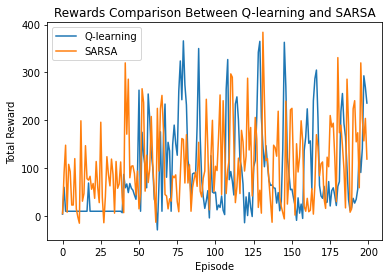

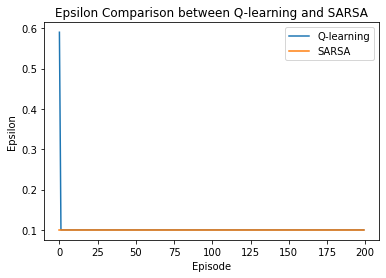

In [38]:
import matplotlib.pyplot as plt


plt.plot(reward_q_learning2, label='Q-learning')
plt.plot(reward_sarsa2, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards Comparison Between Q-learning and SARSA')
plt.legend()
plt.show()


plt.plot(epsilon_q_learning2, label='Q-learning')
plt.plot(epsilon_sarsa2, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Comparison between Q-learning and SARSA')
plt.legend()
plt.show()

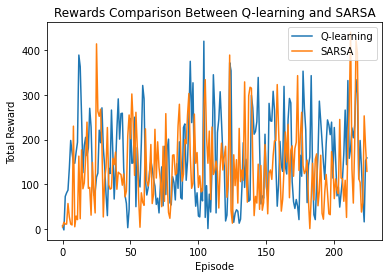

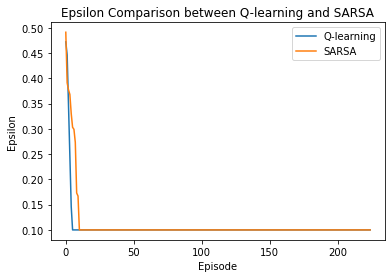

In [39]:
import matplotlib.pyplot as plt


plt.plot(reward_q_learning3, label='Q-learning')
plt.plot(reward_sarsa3, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards Comparison Between Q-learning and SARSA')
plt.legend()
plt.show()


plt.plot(epsilon_q_learning3, label='Q-learning')
plt.plot(epsilon_sarsa3, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Comparison between Q-learning and SARSA')
plt.legend()
plt.show()

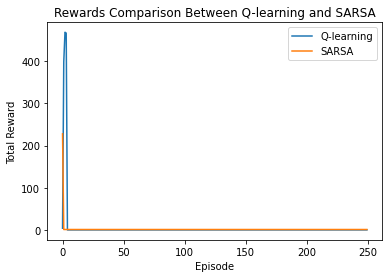

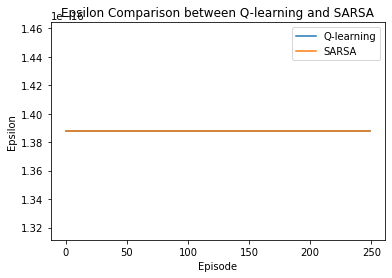

In [40]:
import matplotlib.pyplot as plt


plt.plot(reward_q_learning4, label='Q-learning')
plt.plot(reward_sarsa4, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards Comparison Between Q-learning and SARSA')
plt.legend()
plt.show()


plt.plot(epsilon_q_learning4, label='Q-learning')
plt.plot(epsilon_sarsa4, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Comparison between Q-learning and SARSA')
plt.legend()
plt.show()

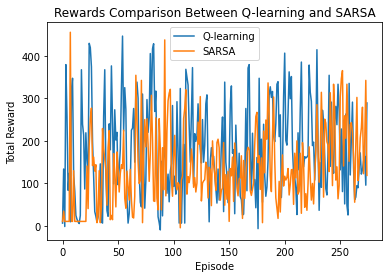

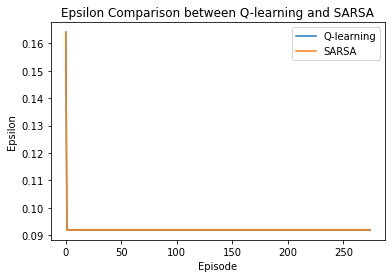

In [41]:
import matplotlib.pyplot as plt


plt.plot(reward_q_learning5, label='Q-learning')
plt.plot(reward_sarsa5, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards Comparison Between Q-learning and SARSA')
plt.legend()
plt.show()


plt.plot(epsilon_q_learning5, label='Q-learning')
plt.plot(epsilon_sarsa5, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Comparison between Q-learning and SARSA')
plt.legend()
plt.show()

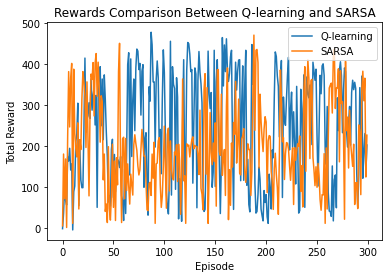

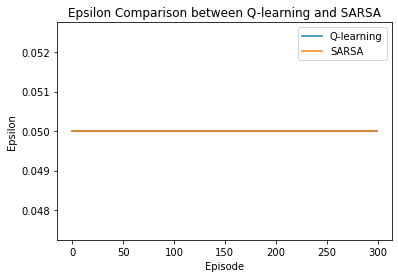

In [42]:
import matplotlib.pyplot as plt


plt.plot(reward_q_learning6, label='Q-learning')
plt.plot(reward_sarsa6, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards Comparison Between Q-learning and SARSA')
plt.legend()
plt.show()


plt.plot(epsilon_q_learning6, label='Q-learning')
plt.plot(epsilon_sarsa6, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Comparison between Q-learning and SARSA')
plt.legend()
plt.show()

**Bonus task
n-step SARSA [5 points]
Modify your SARSA and implement a 2-step bootstrapping SARSA. Compare the results with SARSA.**

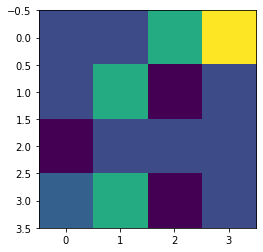

In [43]:
import numpy as np
import gym
environment = GridEnvironment()
observation = environment.reset()
environment.render()

In [44]:
def sarsa_bootstrap(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix):
    epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix = epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix
    # Starting the SARSA learning
    all_rewards, all_epsilons = [], []
    reward, max_reward, average = 0, 0, 0
    for episode in range(number_of_episodes):
        step = 0
        state1 = environment.reset()
        # Action
        action1 = 0
        if np.random.uniform(0, 1) < epsilon:
            action1 = environment.action_space.sample()
        else:
            action1 = np.argmax(Q_matrix[state1, :])
        while step < max_steps:
            environment.render()
            state2, reward, done = environment.step(action1)

            # Next Action
            action2 = 0
            if np.random.uniform(0, 1) < epsilon:
                action2 = environment.action_space.sample()
            else:
                action2 = np.argmax(Q_matrix[state2, :])

            # Next Action
            action3 = 0
            if np.random.uniform(0, 1) < epsilon:
                action3 = environment.action_space.sample()
            else:
                action3 = np.argmax(Q_matrix[state2, :])

            # Learning Q-value
            predict = Q_matrix[state1, action1]
            target = reward + discount * (Q_matrix[state2, action2] + discount * Q_matrix[state2, action3])
            Q_matrix[state1, action1] = Q_matrix[state1, action1] + lr_rate * (target - predict)
            state1 = state2
            action1 = action2

            if epsilon > 0.1:
                epsilon = epsilon - epsilon_decay_rate

            # Updating the respective values
            step = step + 1
            reward = reward + 1

            # If at the end of learning process
            if done:
                all_epsilons.append(epsilon)
                all_rewards.append(reward)  # Add the episode reward to the list
                break
                
        if reward > max_reward:
            max_reward = reward
        print(f'Episode Number : {episode}, Reward : {reward}, Epsilon : {epsilon}')
    print(f'Max Reward : {max_reward}')
    print(f'Performance : {reward/number_of_episodes}')
    print(Q_matrix)
    return all_epsilons, all_rewards


Episode Number : 0, Reward : 40, Epsilon : 0.7999999999999999
Episode Number : 1, Reward : 31, Epsilon : 0.7279999999999999
Episode Number : 2, Reward : -7, Epsilon : 0.6779999999999998
Episode Number : 3, Reward : 13, Epsilon : 0.6679999999999998
Episode Number : 4, Reward : -7, Epsilon : 0.5679999999999997
Episode Number : 5, Reward : 34, Epsilon : 0.46799999999999964
Episode Number : 6, Reward : 20, Epsilon : 0.4389999999999996
Episode Number : 7, Reward : 50, Epsilon : 0.38599999999999957
Episode Number : 8, Reward : 21, Epsilon : 0.2859999999999995
Episode Number : 9, Reward : -9, Epsilon : 0.1859999999999994
Episode Number : 10, Reward : -5, Epsilon : 0.09999999999999931
Episode Number : 11, Reward : 1, Epsilon : 0.09999999999999931
Episode Number : 12, Reward : -11, Epsilon : 0.09999999999999931
Episode Number : 13, Reward : -8, Epsilon : 0.09999999999999931
Episode Number : 14, Reward : -2, Epsilon : 0.09999999999999931
Episode Number : 15, Reward : 43, Epsilon : 0.099999999999

<ipython-input-44-b106c973baa2>:35: RuntimeWarning: overflow encountered in double_scalars
  target = reward + discount * (Q_matrix[state2, action2] + discount * Q_matrix[state2, action3])
<ipython-input-44-b106c973baa2>:36: RuntimeWarning: invalid value encountered in double_scalars
  Q_matrix[state1, action1] = Q_matrix[state1, action1] + lr_rate * (target - predict)


Episode Number : 26, Reward : 1, Epsilon : 0.09999999999999931
Episode Number : 27, Reward : -5, Epsilon : 0.09999999999999931
Episode Number : 28, Reward : 2, Epsilon : 0.09999999999999931
Episode Number : 29, Reward : 2, Epsilon : 0.09999999999999931
Episode Number : 30, Reward : 0, Epsilon : 0.09999999999999931
Episode Number : 31, Reward : -2, Epsilon : 0.09999999999999931
Episode Number : 32, Reward : 11, Epsilon : 0.09999999999999931
Episode Number : 33, Reward : 2, Epsilon : 0.09999999999999931
Episode Number : 34, Reward : 11, Epsilon : 0.09999999999999931
Episode Number : 35, Reward : -146, Epsilon : 0.09999999999999931
Episode Number : 36, Reward : -90, Epsilon : 0.09999999999999931
Episode Number : 37, Reward : -54, Epsilon : 0.09999999999999931
Episode Number : 38, Reward : -82, Epsilon : 0.09999999999999931
Episode Number : 39, Reward : 78, Epsilon : 0.09999999999999931
Episode Number : 40, Reward : 269, Epsilon : 0.09999999999999931
Episode Number : 41, Reward : 192, Epsi

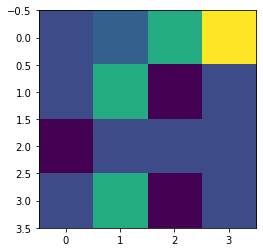

In [45]:
#Defining the different parameters
epsilon = 0.9
epsilon_decay_rate = 0.001
number_of_episodes = 100
max_steps = 100
lr_rate = 0.85             # learning rate or alpha
discount = 0.95            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa_2boot1, rewards_sarsa_2boot1 = sarsa_bootstrap(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

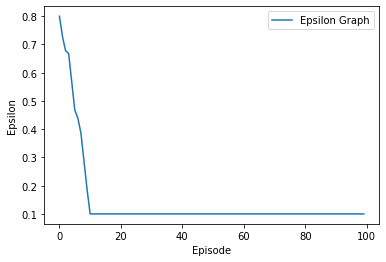

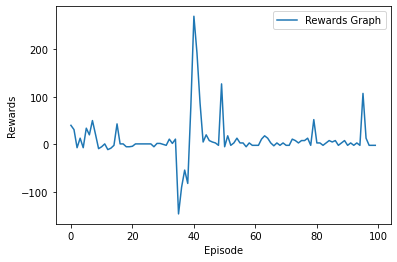

In [57]:
epsilon_plot(epsilon_sarsa_2boot1)
reward_plot(rewards_sarsa_2boot1)

**Comparison of Sarsa with 2 step bootstrapping and Sarsa with 1 step bootstrapping**

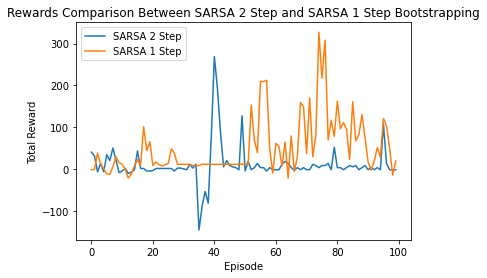

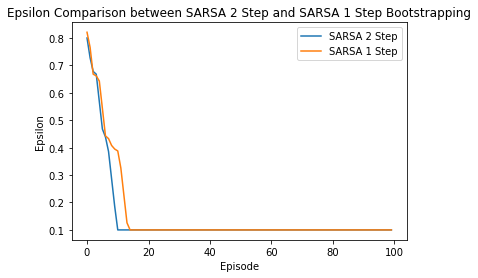

In [47]:
import matplotlib.pyplot as plt


plt.plot(rewards_sarsa_2boot1, label='SARSA 2 Step')
plt.plot(reward_sarsa1, label='SARSA 1 Step')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards Comparison Between SARSA 2 Step and SARSA 1 Step Bootstrapping')
plt.legend()
plt.show()


plt.plot(epsilon_sarsa_2boot1, label='SARSA 2 Step')
plt.plot(epsilon_sarsa1, label='SARSA 1 Step')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Comparison between SARSA 2 Step and SARSA 1 Step Bootstrapping')
plt.legend()
plt.show()